In [364]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

from prince import FAMD
from sklearn.cluster import KMeans
from sklearn import metrics

# Read data

In [2]:
df = pd.read_csv("data/folktables_data/CA_new.csv", na_values=['?'])

In [3]:
df.head()

,AGEP,SEX,WKHP,COW,SCHL,MAR,RAC1P,WAOB,OCCP,INTP,RELSHIPP,CIT,PINCP
0,61,2,35.0,5.0,21.0,5,1,1,ENT,0.0,38,1,14000.0
1,26,2,37.0,1.0,20.0,5,1,1,SAL,0.0,38,1,7600.0
2,51,2,84.0,2.0,21.0,1,1,1,ENT,0.0,38,1,28700.0
3,19,2,20.0,4.0,19.0,5,1,1,SCI,10.0,38,1,12010.0
4,18,2,12.0,1.0,18.0,5,1,1,SAL,0.0,38,1,900.0


# Convert data

- Necessary for FAMD to recognize categorical data

In [4]:
sex = {1: "Male", 2: "Female"}

cow = {1: "Private (for profit)", 2:"Private (non-profit)", 3: "Local gov.", 4: "State gov.", 5:"Federal gov.",
6: "Self-employed (not inc.)", 7: "Self-employed (inc.)", 8:"Without Pay", 9: "Unemployed" }

schl = {1: "No schooling completed", 2: "Nursery school, preschool", 3: "Kindergarten", 4: "Grade 1", 5: "Grade 2", 6: "Grade 3", 7: "Grade 4", 8: "Grade 5", 9: "Grade 6", 10: "Grade 7", 11: "Grade 8", 12: "Grade 9", 13: "Grade 10", 14: "Grade 11", 15: "12th grade - no diploma", 16: "Regular high school diploma", 17: "GED or alternative credential", 18: "Some college, but less than 1 year", 19: "1 or more years of college credit, no degree", 20: "Associate's degree", 21: "Bachelor's degree", 22: "Master's degree", 23: "Professional degree beyond a bachelor's degree", 24: "Doctorate degree"}

mar = {1: "Married", 2:"Widowed", 3:"Divorced", 4:"Separated", 5:"Never Maried"}

race = {1: "White", 2:"African-American", 3:"American-Indian", 4:"Alaska Native", 5:"Am. Indian and Alaska Nat.", 6: "Asian", 7:"Native Hawaiian or Other Pacific Islander", 8: "Other Races (alone)", 9: "Two or More Races"}

waob = {1: "US state", 2: "PR and US Island Areas", 3: "Latin America", 4: "Asia", 5: "Europe", 6: "Africa", 7: "Northern America", 8: "Oceania and at Sea"}

occp = {'MGR': "Management Occupations", 'BUS': "Business Occupations", 'FIN': "Financial Operations Occupations", 'CMM': "Computer and Mathematical Occupations", 'ENG': "Architecture and Engineering Occupations", 'SCI': "Life, Physical, and Social Science Occupations", 'CMS': "Community and Social Service Occupations", 'LGL': "Legal Occupations", 'EDU': "Educational Instruction and Library Occupations", 'ENT': "Arts, Design, Entertainment, Sports, and Media Occupations", 'MED': "Healthcare Practitioners and Technical Occupations", 'HLS': "Healthcare Support Occupations", 'PRT': "Protective Service Occupations", 'EAT': "Food Preparation and Serving Related Occupations", 'CLN': "Building and Grounds Cleaning and Maintenance Occupations", 'PRS': "Personal Care and Service Occupations", 'SAL': "Sales and Related Occupations", 'OFF': "Office and Administrative Support Occupations", 'FFF': "Farming, Fishing, and Forestry Occupations", 'CON': "Construction Occupations", 'EXT': "Extraction Occupations", 'RPR': "Installation, Maintenance, and Repair Occupations", 'PRD': "Production Occupations", 'TRN': "Transportation and Material Moving Occupations", 'MIL': "Military Specific Occupations", 'UEP': "Unemployed, With No Work Experience In The Last 5 Years Or Earlier Or Never Worked"}

relshipp = {20: "Reference person", 21: "Opposite-sex husband/wife/spouse", 22: "Opposite-sex unmarried partner", 23: "Same-sex husband/wife/spouse", 24: "Same-sex unmarried partner", 25: "Biological son or daughter", 26: "Adopted son or daughter", 27: "Stepson or stepdaughter", 28: "Brother or sister", 29: "Father or mother", 30: "Grandchild", 31: "Parent-in-law", 32: "Son-in-law or daughter-in-law", 33: "Other relative", 34: "Roommate or housemate", 35: "Foster child", 36: "Other nonrelative", 37: "Institutionalized group quarters population", 38: "Noninstitutionalized group quarters population"}

cit = {1: "Born in US", 2: "Born in unincorporated territory", 3:"Born abroad (US parents)", 4: "Citizen by Naturalisation", 5:"Not a citizen"}

In [245]:
len(sex)+len(cow)+len(schl)+len(mar)+len(race)+len(waob)+len(occp)+len(relshipp)+len(cit)

107

In [5]:
df.replace({"SEX": sex}, inplace=True)
df.replace({"COW": cow}, inplace=True)
df.replace({"SCHL": schl}, inplace=True)
df.replace({"MAR": mar}, inplace=True)
df.replace({"RAC1P": race}, inplace=True)
df.replace({"WAOB": waob}, inplace=True)
df.replace({"OCCP": occp}, inplace=True)
df.replace({"RELSHIPP": relshipp}, inplace=True)
df.replace({"CIT": cit}, inplace=True)

In [6]:
df.head()

,AGEP,SEX,WKHP,COW,SCHL,MAR,RAC1P,WAOB,OCCP,INTP,RELSHIPP,CIT,PINCP
0,61,Female,35.0,Federal gov.,Bachelor's degree,Never Maried,White,US state,"Arts, Design, Entertainment, Sports, and Media...",0.0,Noninstitutionalized group quarters population,Born in US,14000.0
1,26,Female,37.0,Private (for profit),Associate's degree,Never Maried,White,US state,Sales and Related Occupations,0.0,Noninstitutionalized group quarters population,Born in US,7600.0
2,51,Female,84.0,Private (non-profit),Bachelor's degree,Married,White,US state,"Arts, Design, Entertainment, Sports, and Media...",0.0,Noninstitutionalized group quarters population,Born in US,28700.0
3,19,Female,20.0,State gov.,"1 or more years of college credit, no degree",Never Maried,White,US state,"Life, Physical, and Social Science Occupations",10.0,Noninstitutionalized group quarters population,Born in US,12010.0
4,18,Female,12.0,Private (for profit),"Some college, but less than 1 year",Never Maried,White,US state,Sales and Related Occupations,0.0,Noninstitutionalized group quarters population,Born in US,900.0


# Missing values

In [7]:
df.isna().sum()

AGEP        0
SEX         0
WKHP        0
COW         0
SCHL        0
MAR         0
RAC1P       0
WAOB        0
OCCP        0
INTP        0
RELSHIPP    0
CIT         0
PINCP       0
dtype: int64

# Duplicates

In [8]:
df.duplicated().value_counts()

False    188829
True       3394
dtype: int64

# Pearson pairwise correlation

In [360]:
#moderate to strong correlation with PINCP
continuous_df = df[['AGEP','WKHP','INTP','PINCP']]
corr = continuous_df.corr()
corr

,AGEP,WKHP,INTP,PINCP
AGEP,1.000000,0.052337,0.097908,0.210249
WKHP,0.052337,1.000000,0.007946,0.279938
INTP,0.097908,0.007946,1.000000,0.375804
PINCP,0.210249,0.279938,0.375804,1.000000


# Factor analysis for mixed data (FAMD)

- PCA+MCA
- Categorical attributes are one-hot encoded
- All attributes are normalized
- OBS. Should ordinal attributes be treated as numerical attributes?

- n_components: the number of components that are computed. You only need two if your intention is to make a chart.
- n_iter: the number of iterations used for computing the SVD

In [345]:
#famd = FAMD(n_components=2, n_iter=3, copy=True, check_input=True, random_state=None, engine='auto')

#famd = FAMD().fit(df[['AGEP', 'WKHP', 'INTP', 'PINCP']])
#famd = FAMD().fit(df[['SEX', 'COW', 'SCHL', 'MAR', 'RAC1P', 'WAOB', 'OCCP', 'RELSHIPP', 'CIT']])

famd = FAMD(n_components=69, n_iter=3, random_state=5).fit(df)

In [346]:
famd.groups

{'Numerical': ['AGEP', 'WKHP', 'INTP', 'PINCP'],
 'Categorical': ['COW',
  'RELSHIPP',
  'OCCP',
  'SCHL',
  'RAC1P',
  'CIT',
  'SEX',
  'WAOB',
  'MAR']}

In [347]:
famd_df = famd.transform(df)

In [349]:
#69 components to explain 80% of the variance in the original data
famd.explained_inertia_.sum()

0.8001437626445546

In [350]:
#component, eigenvalue, percentage of variance, cumulative percentage of variance
pc_df = pd.DataFrame(data=[famd.eigenvalues_.T, famd.explained_inertia_.T, np.cumsum(famd.explained_inertia_)]).T
pc_df.columns = ['Eigenvalue', 'Inertia', 'Inertia cumulative']

In [351]:
pc_df

,Eigenvalue,Inertia,Inertia cumulative
0,6.279630e-06,0.054025,0.054025
1,4.173263e-06,0.035903,0.089928
2,3.507747e-06,0.030178,0.120106
3,3.136716e-06,0.026986,0.147092
4,2.653842e-06,0.022831,0.169923
...,...,...,...
64,9.902902e-07,0.008520,0.766765
65,9.836175e-07,0.008462,0.775227
66,9.739201e-07,0.008379,0.783606
67,9.652471e-07,0.008304,0.791910


In [352]:
cc_df = famd.column_correlations(df)

In [542]:
cc_df.sort_values(by=0, key=abs).tail(25)

,0,1,2,3,4,5,6,7,8,9,...,59,60,61,62,63,64,65,66,67,68
OCCP_Transportation and Material Moving Occupations,-0.096561,-0.094463,-0.011844,-0.066706,0.097559,0.099729,0.099989,-0.100312,0.100360,-0.100339,...,-0.100013,-0.100256,0.100226,-0.100318,-0.100207,0.098431,-0.100344,0.100142,0.100072,-0.100095
OCCP_Healthcare Practitioners and Technical Occupations,0.098247,0.095045,-0.002491,0.059416,-0.106989,-0.107432,-0.107317,0.105900,-0.106473,0.106734,...,0.104783,0.105596,-0.105470,0.105915,0.105408,-0.101419,0.106106,-0.105171,-0.104952,0.105020
COW_Self-employed (inc.),0.108214,0.109395,0.061313,0.102720,-0.083765,-0.092034,-0.093579,0.099724,-0.098047,0.097074,...,0.102079,0.100477,-0.100759,0.099702,0.100881,-0.106151,0.099184,-0.101371,-0.101783,0.101658
OCCP_Legal Occupations,0.111917,0.108696,0.002942,0.071059,-0.118778,-0.119991,-0.120010,0.119097,-0.119542,0.119720,...,0.118153,0.118850,-0.118746,0.119113,0.118692,-0.115046,0.119263,-0.118489,-0.118300,0.118357
OCCP_Food Preparation and Serving Related Occupations,-0.115491,-0.112369,-0.006156,-0.075146,0.120812,0.122483,0.122584,-0.122020,0.122394,-0.122486,...,-0.121247,-0.121843,0.121762,-0.122067,-0.121706,0.118529,-0.122175,0.121532,0.121373,-0.121410
SCHL_Bachelor's degree,0.123311,0.120493,0.012859,0.083931,-0.125751,-0.128246,-0.128517,0.128686,-0.128813,0.128820,...,0.128182,0.128564,-0.128510,0.128684,0.128489,-0.125925,0.128743,-0.128375,-0.128267,0.128300
SEX_Male,0.124432,0.122110,0.020046,0.088849,-0.123057,-0.126454,-0.126910,0.127951,-0.127828,0.127676,...,0.127854,0.127953,-0.127949,0.127955,0.127948,-0.126517,0.127928,-0.127913,-0.127882,0.127884
SEX_Female,-0.124432,-0.122110,-0.020046,-0.088849,0.123057,0.126454,0.126910,-0.127951,0.127828,-0.127676,...,-0.127854,-0.127953,0.127949,-0.127955,-0.127948,0.126517,-0.127928,0.127913,0.127882,-0.127884
WAOB_Latin America,-0.131513,-0.128938,-0.019252,-0.092734,0.131259,0.134556,0.134990,-0.135834,0.135746,-0.135671,...,-0.135582,-0.135776,0.135749,-0.135799,-0.135751,0.133750,-0.135809,0.135696,0.135633,-0.135663
OCCP_Computer and Mathematical Occupations,0.143512,0.138502,-0.008522,0.084002,-0.158857,-0.158906,-0.158609,0.155976,-0.156972,0.157445,...,0.154072,0.155436,-0.155219,0.155988,0.155123,-0.148585,0.156324,-0.154716,-0.154350,0.154462


# K-means

In [381]:
intertias = []
sil_scores = []
CH_scores = []

K = range(2,11)

for k in K:
    model = KMeans(n_clusters=k, init='k-means++', n_init=50, max_iter=500, random_state=5).fit(famd_df) #k-means++ instead of random (ensure centroids are intiitalized with some distance between them)
    labels = model.labels_
    intertias.append(model.inertia_)
    sil_scores.append(metrics.silhouette_score(famd_df, labels, metric='euclidean'))
    CH_scores.append(metrics.calinski_harabasz_score(famd_df, labels))

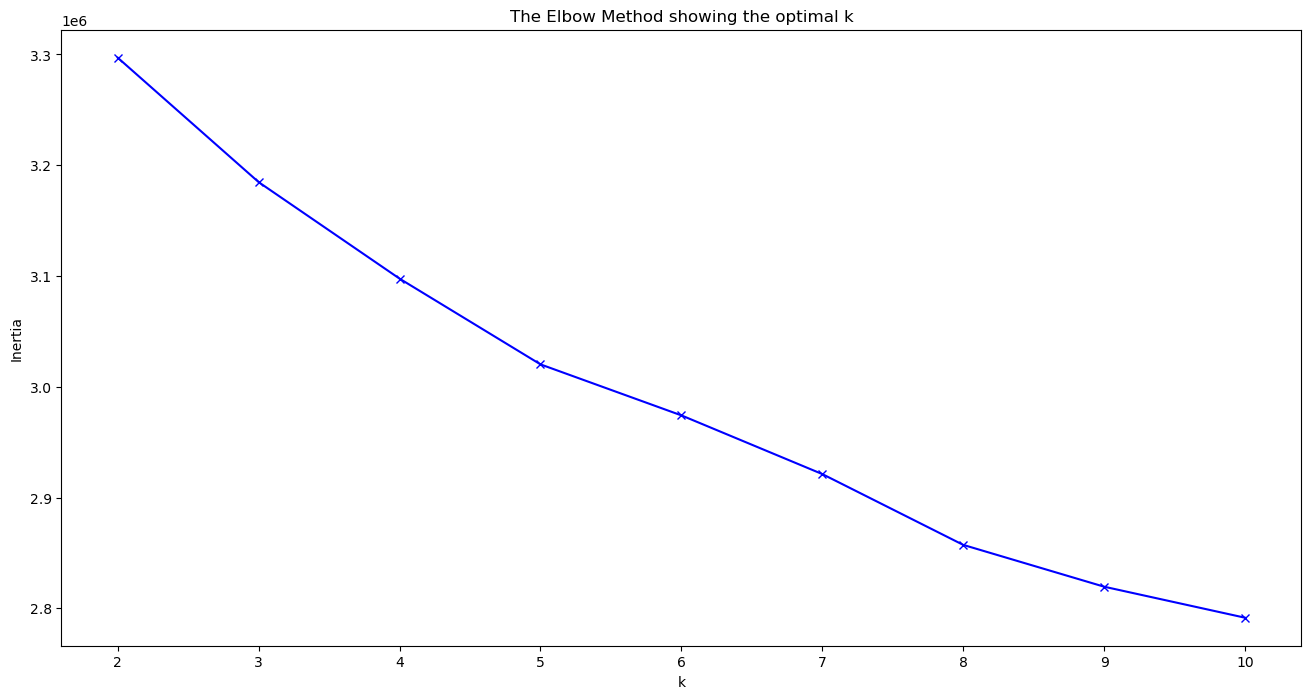

In [382]:
plt.figure(figsize=(16,8))
plt.plot(K, intertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()

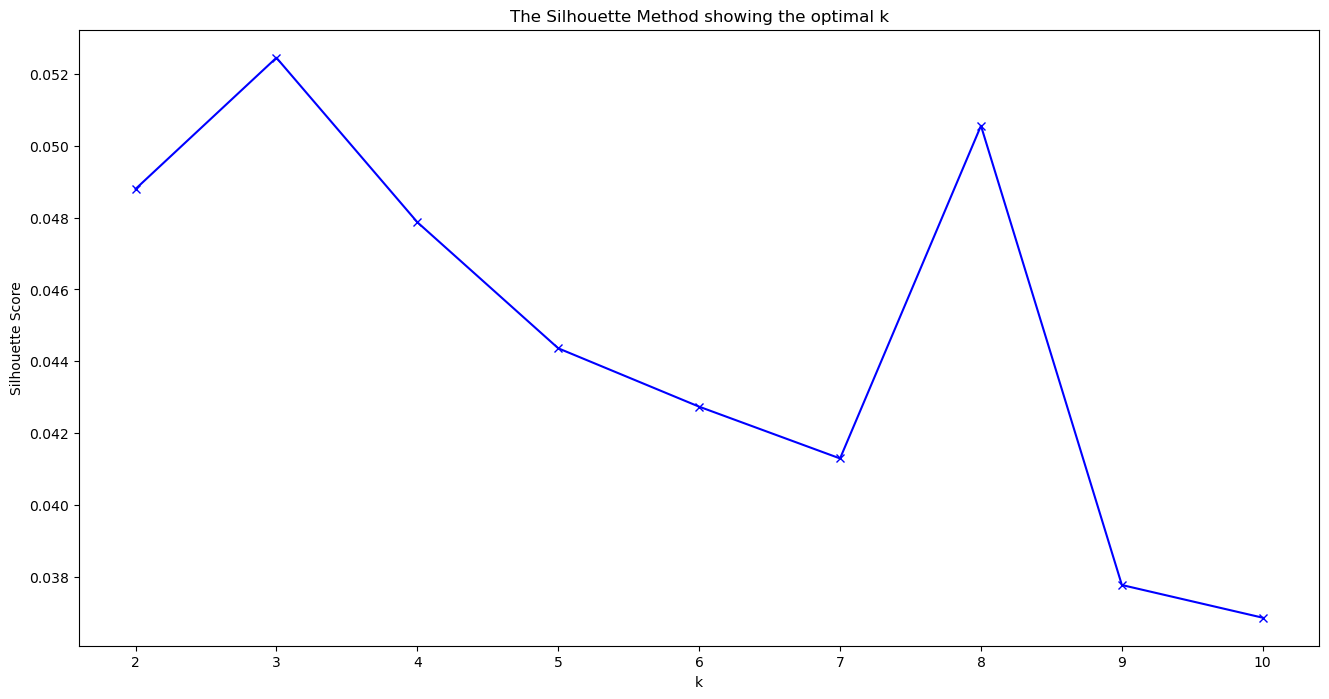

In [543]:
plt.figure(figsize=(16,8))
plt.plot(K, sil_scores, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('The Silhouette Method showing the optimal k')
plt.show()

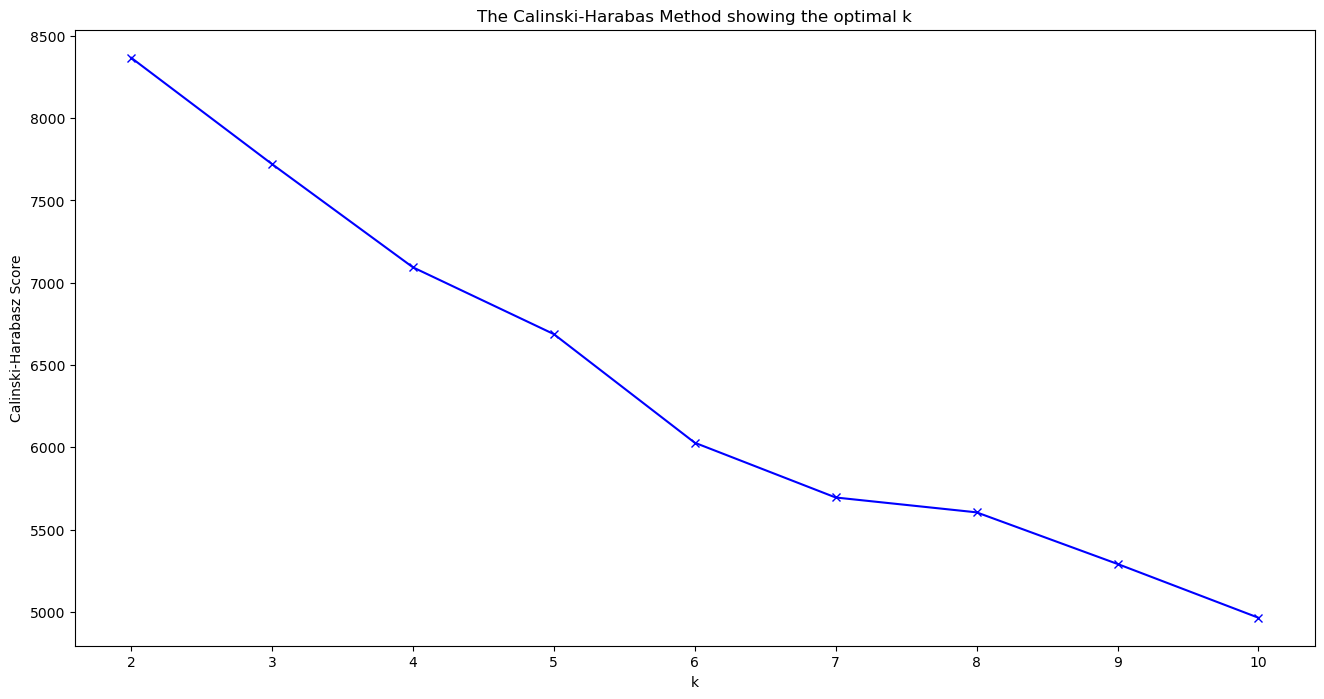

In [384]:
plt.figure(figsize=(16,8))
plt.plot(K, CH_scores, 'bx-')
plt.xlabel('k')
plt.ylabel('Calinski-Harabasz Score')
plt.title('The Calinski-Harabas Method showing the optimal k')
plt.show()

In [385]:
final_model = KMeans(n_clusters=3, init='k-means++', n_init=50, max_iter=500, random_state=5).fit(famd_df)
clusters = final_model.labels_
df['clusters'] = clusters

Text(0.5, 1.0, 'Clusters determined by Kmeans')

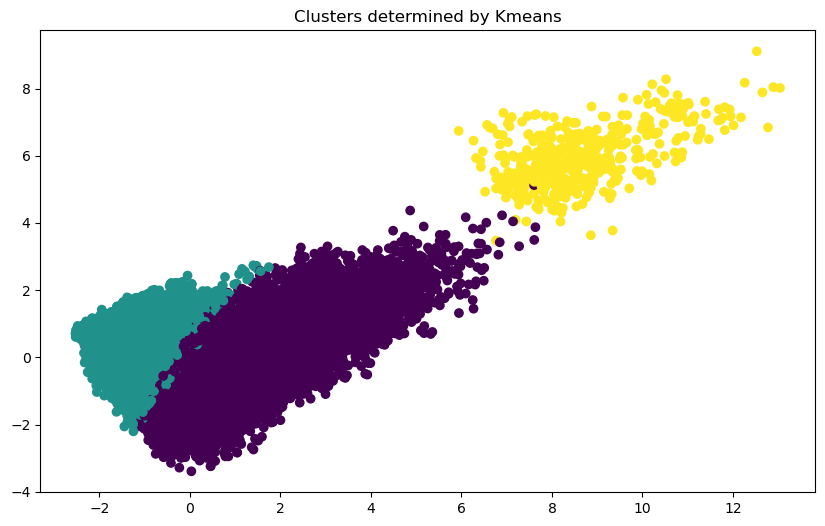

In [459]:
plt.figure(figsize=(10,6))
plt.scatter(famd_df.iloc[:,0], famd_df.iloc[:,1], c=clusters)
plt.title("Clusters determined by Kmeans")

# K-means interpretation

In [391]:
df.columns

Index(['AGEP', 'SEX', 'WKHP', 'COW', 'SCHL', 'MAR', 'RAC1P', 'WAOB', 'OCCP',
       'INTP', 'RELSHIPP', 'CIT', 'PINCP', 'clusters'],
      dtype='object')

In [534]:
def interpret_data(df, k):
    stats = {}
    for col in df.columns:
        if col in ['AGEP', 'WKHP', 'INTP', 'PINCP']:
            stats[col] = df.groupby(['clusters'])[col].describe()
        elif col not in ['clusters']:
            curr = df.groupby(['clusters', col])[col].describe()
            dfs = []
            n = len([j for j in curr.index if j[0] == 0])
            start = 0
            end = n
            for i in range(k):
                n = len([j for j in curr.index if j[0] == i])
                curr_curr = curr[int(start):int(end)].copy()
                curr_curr['pct'] = curr_curr['freq'] / curr_curr['count'].sum()
                dfs.append(curr_curr)
                start += n
                end += n
            stats[col] = pd.concat(dfs)
    return stats

In [535]:
stats_dict = interpret_data(df, 3)

In [536]:
for col in df.columns[:-1]:
    print(col)
    print(stats_dict[col])
    print('##########')

AGEP
             count       mean        std   min   25%   50%   75%   max
clusters                                                              
0         118993.0  51.512627  11.358772  21.0  43.0  52.0  60.0  94.0
1          72769.0  29.125218   7.804708  17.0  23.0  28.0  34.0  69.0
2            461.0  57.084599  13.128272  23.0  49.0  58.0  66.0  94.0
##########
SEX
                 count unique     top   freq       pct
clusters SEX                                          
0        Female  55403      1  Female  55403  0.465599
         Male    63590      1    Male  63590  0.534401
1        Female  34633      1  Female  34633  0.475931
         Male    38136      1    Male  38136  0.524069
2        Female    117      1  Female    117  0.253796
         Male      344      1    Male    344  0.746204
##########
WKHP
             count       mean        std  min   25%   50%   75%   max
clusters                                                             
0         118993.0  39.550352